In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
import scipy.stats as stats
from matplotlib.ticker import PercentFormatter

In [3]:
# File to Load
movie_data = "Movie_Data.csv"

# Read the Movie Data
movie = pd.read_csv('Movie_Data.csv')

# Display the data table for preview
movie.head()

,IMDb ID,Title,Runtime (mins),Year,Genres,Release Date,IMDb Rating,Metascore,Rating,Box Office
0,tt1872181,The Amazing Spider-Man 2,142,2014,"Action, Adventure, Sci-Fi",4/10/2014,6.6,53,PG-13,183277573
1,tt1323594,Despicable Me,95,2010,"Animation, Comedy, Family, Fantasy",6/20/2010,7.7,72,PG,251476985
2,tt1375670,Grown Ups,102,2010,Comedy,6/24/2010,6.0,30,PG-13,162001186
3,tt0892769,How to Train Your Dragon,98,2010,"Animation, Action, Adventure, Family, Fantasy",3/18/2010,8.1,74,PG,216900000
4,tt1375666,Inception,148,2010,"Action, Adventure, Sci-Fi, Thriller",7/8/2010,8.8,74,PG-13,292568851


In [4]:
#Extract relevant columns
movie = movie[['Genres', 'Box Office', 'Year']]
movie.head()

,Genres,Box Office,Year
0,"Action, Adventure, Sci-Fi",183277573,2014
1,"Animation, Comedy, Family, Fantasy",251476985,2010
2,Comedy,162001186,2010
3,"Animation, Action, Adventure, Family, Fantasy",216900000,2010
4,"Action, Adventure, Sci-Fi, Thriller",292568851,2010


In [5]:
genre_set = set()
for row in movie['Genres'].str.split(", "):
    for genre in row:
        if genre not in genre_set:
            genre_set.add(genre)
    

In [6]:
genre_set = list(genre_set)

In [7]:
# Create a list 
averages_list = []
for genre in genre_set:
    mask = movie["Genres"].str.contains(f'{genre}')==True
    avg = movie[mask]["Box Office"].mean()
    averages_list.append(avg)   

In [8]:
# Covert Box Office to millions
averages_list = [x/1000000 for x in averages_list]
averages_list

[113.4111595549133,
 122.88188585526316,
 138.4912569032258,
 95.066479,
 42.21486465384615,
 22.54826979761905,
 29.383784037313433,
 35.24443222767857,
 42.86875228703704,
 2.98926508,
 26.34676623214286,
 111.68704716666667,
 51.67360983636364,
 46.52079175884245,
 115.78014762727273,
 129.59390039215688,
 35.3096476626506,
 25.05508141860465,
 52.621246884514434,
 57.635095642857145,
 0.061153,
 61.16326675]

In [9]:
# Show Genres
genre_set

['Fantasy',
 'Sci-Fi',
 'Animation',
 'Action',
 'Sport',
 'Biography',
 'Drama',
 'Romance',
 'Mystery',
 'Documentary',
 'Horror',
 'Musical',
 'Music',
 'Thriller',
 'Family',
 'Adventure',
 'Crime',
 'History',
 'Comedy',
 'Western',
 'News',
 'War']

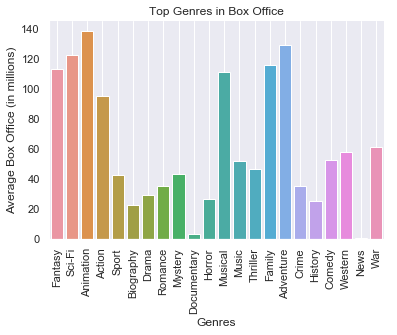

In [10]:
# Bar Chart to identify top Genres
sns.barplot(genre_set, averages_list)
sns.despine()
plt.xticks(rotation=90);

# Add labels to the x and y axes
plt.title("Top Genres in Box Office")
plt.xlabel("Genres")
plt.ylabel("Average Box Office (in millions)")

# Set your grid
plt.grid()

# Save the plot and display it
plt.savefig("Top_Genres.png")

# Show figure
plt.show()

In [11]:
#Plot changes over time with a Line graph

Animation = movie[movie["Genres"].str.contains("Animation")]

Animation.head()

,Genres,Box Office,Year
1,"Animation, Comedy, Family, Fantasy",251476985,2010
3,"Animation, Action, Adventure, Family, Fantasy",216900000,2010
10,"Animation, Adventure, Comedy, Family, Fantasy",414984497,2010
26,"Animation, Adventure, Comedy, Family, Fantasy",237282182,2012
40,"Animation, Comedy, Family, Fantasy",148280635,2012


In [12]:
animation2010 = Animation["Box Office"][Animation["Year"] == 2010].mean()
animation2011 = Animation["Box Office"][Animation["Year"] == 2011].mean()
animation2012 = Animation["Box Office"][Animation["Year"] == 2012].mean()
animation2013 = Animation["Box Office"][Animation["Year"] == 2013].mean()
animation2014 = Animation["Box Office"][Animation["Year"] == 2014].mean()
animation2015 = Animation["Box Office"][Animation["Year"] == 2015].mean()
animation2016 = Animation["Box Office"][Animation["Year"] == 2016].mean()

In [13]:
Adventure = movie[movie["Genres"].str.contains("Adventure")]

Adventure.head()

,Genres,Box Office,Year
0,"Action, Adventure, Sci-Fi",183277573,2014
3,"Animation, Action, Adventure, Family, Fantasy",216900000,2010
4,"Action, Adventure, Sci-Fi, Thriller",292568851,2010
5,"Action, Adventure, Sci-Fi",312057433,2010
9,"Action, Adventure, Fantasy, Sci-Fi",172051787,2010


In [14]:
adventure2010 = Adventure["Box Office"][Adventure["Year"] == 2010].mean()
adventure2011 = Adventure["Box Office"][Adventure["Year"] == 2011].mean()
adventure2012 = Adventure["Box Office"][Adventure["Year"] == 2012].mean()
adventure2013 = Adventure["Box Office"][Adventure["Year"] == 2013].mean()
adventure2014 = Adventure["Box Office"][Adventure["Year"] == 2014].mean()
adventure2015 = Adventure["Box Office"][Adventure["Year"] == 2015].mean()
adventure2016 = Adventure["Box Office"][Adventure["Year"] == 2016].mean()

In [15]:
SciFi = movie[movie["Genres"].str.contains("Sci-Fi")]

SciFi.head()

,Genres,Box Office,Year
0,"Action, Adventure, Sci-Fi",183277573,2014
4,"Action, Adventure, Sci-Fi, Thriller",292568851,2010
5,"Action, Adventure, Sci-Fi",312057433,2010
9,"Action, Adventure, Fantasy, Sci-Fi",172051787,2010
14,"Mystery, Sci-Fi, Thriller",79230923,2011


In [16]:
scifi2010 = SciFi["Box Office"][SciFi["Year"] == 2010].mean()
scifi2011 = SciFi["Box Office"][SciFi["Year"] == 2011].mean()
scifi2012 = SciFi["Box Office"][SciFi["Year"] == 2012].mean()
scifi2013 = SciFi["Box Office"][SciFi["Year"] == 2013].mean()
scifi2014 = SciFi["Box Office"][SciFi["Year"] == 2014].mean()
scifi2015 = SciFi["Box Office"][SciFi["Year"] == 2016].mean()
scifi2016 = SciFi["Box Office"][SciFi["Year"] == 2016].mean()

In [17]:
Family = movie[movie["Genres"].str.contains("Family")]

Family.head()

,Genres,Box Office,Year
1,"Animation, Comedy, Family, Fantasy",251476985,2010
3,"Animation, Action, Adventure, Family, Fantasy",216900000,2010
10,"Animation, Adventure, Comedy, Family, Fantasy",414984497,2010
26,"Animation, Adventure, Comedy, Family, Fantasy",237282182,2012
39,"Adventure, Family, Fantasy",303001229,2012


In [18]:
family2010 = Family["Box Office"][Family["Year"] == 2010].mean()
family2011 = Family["Box Office"][Family["Year"] == 2011].mean()
family2012 = Family["Box Office"][Family["Year"] == 2012].mean()
family2013 = Family["Box Office"][Family["Year"] == 2013].mean()
family2014 = Family["Box Office"][Family["Year"] == 2014].mean()
family2015 = Family["Box Office"][Family["Year"] == 2016].mean()
family2016 = Family["Box Office"][Family["Year"] == 2016].mean()

In [19]:
Years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016']
animation_list = [animation2010, animation2011, animation2012, animation2013, animation2014, animation2015, animation2016]
adventure_list = [adventure2010, adventure2011, adventure2012, adventure2013, adventure2014, adventure2015, adventure2016]
scifi_list = [scifi2010, scifi2011, scifi2012, scifi2013, scifi2014, scifi2015, scifi2016]
family_list = [family2010, family2011, family2012, family2013, family2014, family2015, family2016]

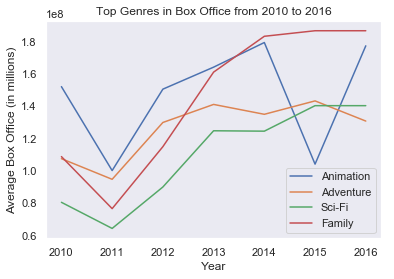

In [20]:
# Line chart to identify top Genres over Years
sns.lineplot(x= Years, y= animation_list, label = "Animation")
sns.lineplot(x= Years, y=adventure_list, label = "Adventure")
sns.lineplot(x= Years, y=scifi_list, label = "Sci-Fi")
sns.lineplot(x= Years, y=family_list, label = "Family")

# Add labels to the x and y axes
plt.title("Top Genres in Box Office from 2010 to 2016")
plt.xlabel("Year")
plt.ylabel("Average Box Office (in millions)")

# Set your grid
plt.grid()

# Save the plot and display it
plt.savefig("Top_Genres_Years.png")

# Show figure
plt.show()

## Observations

   1) The top four genres based on box office revenue were animation, adventure, sci-fi, and fantasy. 
   
   2) Animation has the lowest box office revenue in 2015 compared to the other top genres. 
   
   3) Family genre has the lowest box office revenue compared to the other top genres, but it did had a gradual      incline in revenue over the years. 

## Highlight 

 Althought animation was the top genre with the highest box office revenue between 2010 to 2016, it had a lowest box office revenue in 2015 compared to the other top genres. 
